In [1]:
import pandas as pd
import numpy as np

import gensim
from gensim import utils
import sys
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk import download
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

## Download 20Newsgroup dataset

In [17]:
# In order to get faster execution times for this  example we will work with only 4 categories out of the 20 available in the dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [18]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, 
                                  remove=('headers', 'footers', 'quotes'))

In [19]:
# text and ground truth labels
texts, y = twenty_train.data, twenty_train.target

## Tokenize, remove stopwords

In [20]:
download('punkt') #tokenizer, run once
download('stopwords') #stopwords dictionary, run once
stop_words = stopwords.words('english')

def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stop_words]
    doc = [word for word in doc if word.isalpha()] #restricts string to alphabetic characters only
    return doc

[nltk_data] Downloading package punkt to
[nltk_data]     /home/l.poberezhnya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/l.poberezhnya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
corpus = [preprocess(text) for text in texts]

In [ ]:
 if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

## Remove empty docs

In [ ]:
def filter_docs(corpus, texts, labels, condition_on_doc):
    """
    Filter corpus, texts and labels given the function condition_on_doc which takes
    a doc.
    The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    labels = [i for (i, doc) in zip(labels, corpus) if condition_on_doc(doc)]
    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts, labels)

In [30]:
corpus, texts, y = filter_docs(corpus, texts, y, lambda doc: (len(doc) != 0))

52 docs removed


# Download pre-trained word2vec model provided by Google.
### This model was trained on 100 billion words of Google News and contains 300-dimensional vectors for 3 million words and phrases

In [ ]:
#model Google News, run once to download pre-trained vectors
#!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

In [7]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

## Remove OOV words and documents with no words in model dictionary

In [34]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.vocab]
    return np.mean(word2vec_model[doc], axis=0)

In [44]:
def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    return not all(word not in word2vec_model.vocab for word in doc)

In [45]:
corpus, texts, y = filter_docs(corpus, texts, y, lambda doc: has_vector_representation(model, doc))

0 docs removed


In [46]:
#  For each document, the mean of the embeddings of each word was calculated,
#so that each document is represented by a 300-dimensional vector.
x =[]
for doc in corpus: #look up each doc in model
    x.append(document_vector(model, doc))

In [51]:
X = np.array(x) #list to array

## Plot 2 PCA components

In [54]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

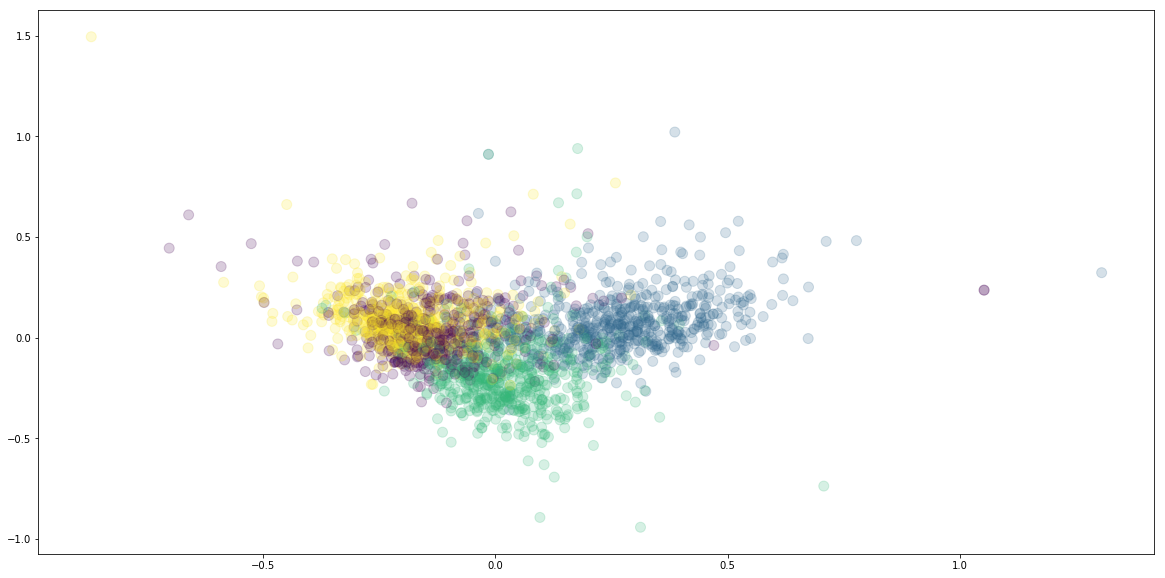

In [68]:
plt.figure(1, figsize=(20, 10),)
plt.scatter(x_pca[:, 0], x_pca[:, 1],s=100, c=y, alpha=0.2)

In [61]:
## Plot t-SNE

In [59]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2205 samples in 0.025s...
[t-SNE] Computed neighbors for 2205 samples in 4.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2205
[t-SNE] Computed conditional probabilities for sample 2000 / 2205
[t-SNE] Computed conditional probabilities for sample 2205 / 2205
[t-SNE] Mean sigma: 0.167335
[t-SNE] Computed conditional probabilities in 0.159s
[t-SNE] Iteration 50: error = 86.8908234, gradient norm = 0.2296028 (50 iterations in 3.278s)
[t-SNE] Iteration 100: error = 88.5228882, gradient norm = 0.1801388 (50 iterations in 3.053s)
[t-SNE] Iteration 150: error = 88.0792999, gradient norm = 0.2065877 (50 iterations in 2.818s)
[t-SNE] Iteration 200: error = 87.3622131, gradient norm = 0.2061578 (50 iterations in 2.810s)
[t-SNE] Iteration 250: error = 87.4068604, gradient norm = 0.2145335 (50 iterations in 2.830s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.406860
[t-SNE] Iteration 300: erro

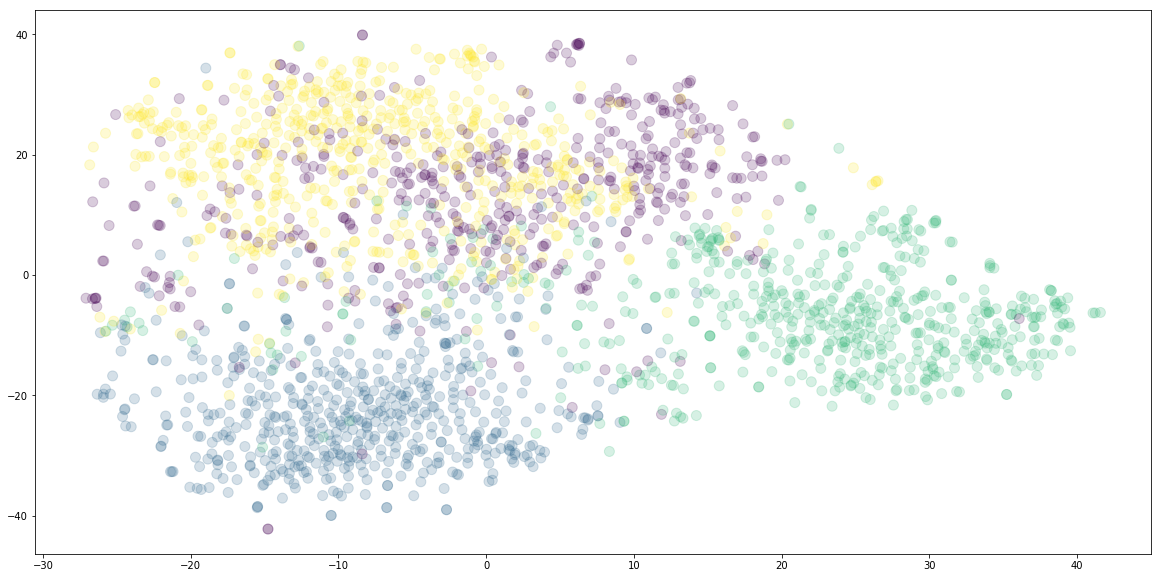

In [65]:
plt.figure(1, figsize=(20, 10),)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],s=100, c=y, alpha=0.2)